### Imports

In [43]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

### Free fall with nonzero initial velocity
Parameters setup

In [44]:
const_g = 9.81
const_C = .005 # water resistance parameter
force_B = .1 # force of buoyancy
delta = .01
ts = np.arange(0,7,delta)
depth = 20
init_h = 100
init_v = -10

Euler method

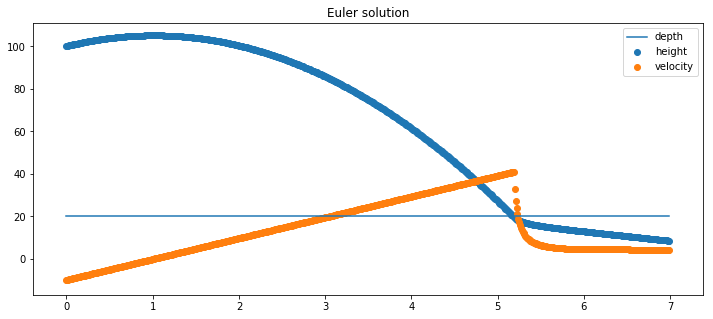

In [45]:
h = init_h
v = init_v

euler_traj = {"height":[], "velocity":[]}
for t in ts:

    if h > 20: #Air regime
        h = h - v * delta
        v = v + const_g*delta
        euler_traj["height"].append(h)
        euler_traj["velocity"].append(v)
    elif h > 0: #Water regime
        h = h - v * delta
        v = v + const_g*delta - force_B*delta - const_C*v**2
        euler_traj["height"].append(h)
        euler_traj["velocity"].append(v)
    else:
        euler_traj["height"].append(0)
        euler_traj["velocity"].append(0)
plt.figure(figsize=(12, 5))
plt.title("Euler solution")
plt.scatter(ts, euler_traj["height"], label="height")
plt.scatter(ts, euler_traj["velocity"], label="velocity")
plt.plot(ts, np.repeat(depth, len(ts)), label="depth")
plt.legend();

Midpoint method

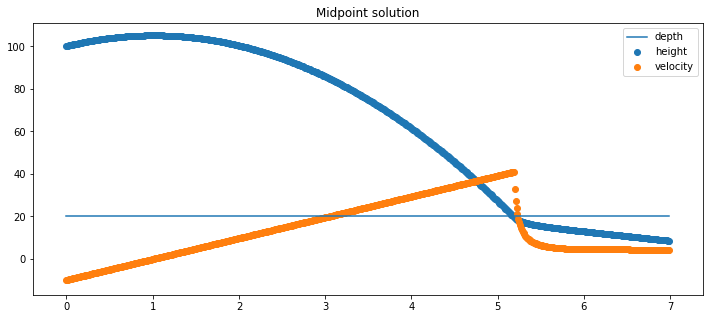

In [51]:
h = init_h
v = init_v

midpoint_traj = {"height":[], "velocity":[]}
for t in ts:

    if h > 20: #Air regime
        k1v = (v + v + const_g*delta)/2
        k2v = (k1v + k1v + const_g*delta)/2
        k1h = (h + h - v*delta)/2
        k2h = (k1h + k1h - v* delta)/2
        
        h = k2h
        v = k2v
        midpoint_traj["height"].append(h)
        midpoint_traj["velocity"].append(v)
    elif h > 0: #Water regime
        k1v = (v + v + const_g*delta - force_B*delta - const_C*v**2)/2
        k2v = (k1v + k1v + const_g*delta - force_B*delta - const_C*v**2)/2
        k1h = (h + h - delta*v)/2
        k2h = (k1h + k1h - delta*v)/2
        
        h = k2h
        v = k2v      
        midpoint_traj["height"].append(h)
        midpoint_traj["velocity"].append(v)
    else:
        midpoint_traj["height"].append(0)
        midpoint_traj["velocity"].append(0)
        
plt.figure(figsize=(12, 5))
plt.title("Midpoint solution")
plt.scatter(ts, midpoint_traj["height"], label="height")
plt.scatter(ts, midpoint_traj["velocity"], label="velocity")
plt.plot(ts, np.repeat(depth, len(ts)), label="depth")
plt.legend();

4<sup>th</sup> order Runge–Kutta  method

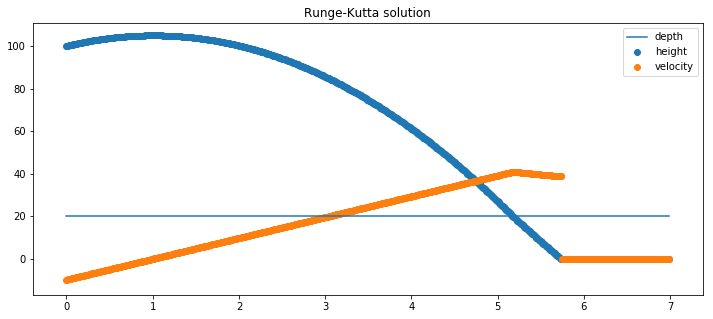

In [52]:
h = init_h
v = init_v

runge_traj = {"height":[], "velocity":[]}
for t in ts:

    if h > 20: #Air regime
        k1h = init_v + const_g*t
        k2h = init_v + const_g*(t+delta/2)
        k3h = init_v + const_g*(t+delta/2) 
        k4h = init_v + const_g*(t+delta)

        k1v = const_g
        k2v = const_g
        k3v = const_g
        k4v = const_g 
        
        h = h - delta*(k1h + 2*k2h + 2*k3h + k4h)/6
        v = v + delta*(k1v + 2*k2v + 2*k3v + k4v)/6
        runge_traj["height"].append(h)
        runge_traj["velocity"].append(v)
    elif h > 0: #Water regime
        k1h = v
        k2h = (v + v + const_g*delta - delta*force_B - const_C*v**2)/2
        k3h = k2h
        k4h = v + const_g*delta - delta*force_B - const_C*v**2
        
        k1v = const_g*delta - delta*force_B - const_C*v**2
        k2v = (2*const_g*delta - 2*delta*force_B - const_C*v**2 -const_C*(k1v)**2)/2
        k3v = (2*const_g*delta - 2*delta*force_B - const_C*v**2 -const_C*(k2v)**2)/2
        k4v = const_g*delta - delta*force_B - const_C*(k3v)**2
        
        h = h - delta*(k1h + 2*k2h + 2*k3h + k4h)/6
        v = v + delta*(k1v + 2*k2v + 2*k3v + k4v)/6 
        runge_traj["height"].append(h)
        runge_traj["velocity"].append(v)
    else:
        runge_traj["height"].append(0)
        runge_traj["velocity"].append(0)
        
plt.figure(figsize=(12, 5))
plt.title("Runge-Kutta solution")
plt.scatter(ts, runge_traj["height"], label="height")
plt.scatter(ts, runge_traj["velocity"], label="velocity")
plt.plot(ts, np.repeat(depth, len(ts)), label="depth")
plt.legend();

Comparison

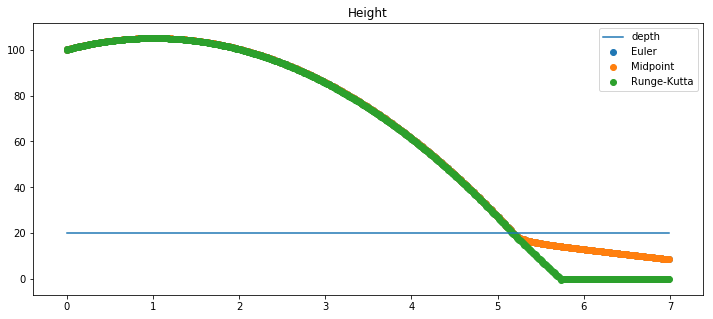

In [53]:
plt.figure(figsize=(12, 5))
plt.title("Height")
plt.scatter(ts, euler_traj["height"], label="Euler")
plt.scatter(ts, midpoint_traj["height"], label="Midpoint")
plt.scatter(ts, runge_traj["height"], label="Runge-Kutta")
plt.plot(ts, np.repeat(depth, len(ts)), label="depth")
plt.legend();

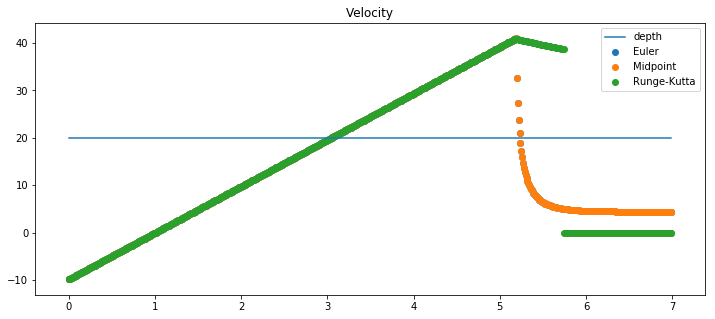

In [54]:
plt.figure(figsize=(12, 5))
plt.title("Velocity")
plt.scatter(ts, euler_traj["velocity"], label="Euler")
plt.scatter(ts, midpoint_traj["velocity"], label="Midpoint")
plt.scatter(ts, runge_traj["velocity"], label="Runge-Kutta")
plt.plot(ts, np.repeat(depth, len(ts)), label="depth")
plt.legend();